In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

<h1>Linear Damage</h1>

In [2]:
df = pd.read_csv('input/results_complete_linear.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['elem_damaged', 'damage'], axis=1), df['elem_damaged'], test_size=0.10, random_state=41)

In [4]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

In [5]:
%%time
path = 'models/linear_class'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(126)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                10160     
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 80)                6480      
                                                                 
 dense_3 (Dense)             (None, 129)               10449     
                                                                 
Total params: 33,569
Trainable params: 33,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 1s 1ms/step - loss: 4.5802 - accuracy: 0.0856 - val_loss: 4.2733 - val_accuracy: 0.1411
Epoch 2/1000
726/726 [==================

INFO:tensorflow:Assets written to: models/linear_class/assets


INFO:tensorflow:Assets written to: models/linear_class/assets


CPU times: user 24min 36s, sys: 3min 27s, total: 28min 4s
Wall time: 13min 31s


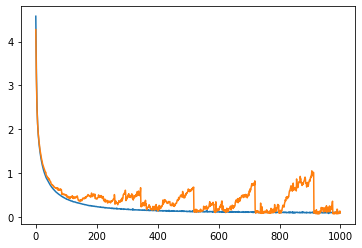

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [7]:
pred = model.predict(X_test)

<h3>Classification Report</h3>

In [8]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      1.00      1.00        18
           2       1.00      0.96      0.98        23
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23
           5       0.89      0.80      0.84        20
           6       1.00      0.96      0.98        23
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        13
          10       1.00      0.74      0.85        23
          11       1.00      0.94      0.97        17
          12       1.00      0.94      0.97        16
          13       1.00      1.00      1.00        31
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        25
          17       1.00    

<h1>Exponential Damage</h1>

In [10]:
df_exp = pd.read_csv('input/results_complete_exponential.csv')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['elem_damaged', 'damage'], axis=1), df_exp['elem_damaged'], test_size=0.10, random_state=41)

In [12]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

In [13]:
%%time
path = 'models\\exp_class'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(126)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                10160     
                                                                 
 dense_5 (Dense)             (None, 80)                6480      
                                                                 
 dense_6 (Dense)             (None, 80)                6480      
                                                                 
 dense_7 (Dense)             (None, 129)               10449     
                                                                 
Total params: 33,569
Trainable params: 33,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 1s 1ms/step - loss: 4.6154 - accuracy: 0.0724 - val_loss: 4.2442 - val_accuracy: 0.1217
Epoch 2/1000
726/726 [================

INFO:tensorflow:Assets written to: models\exp_class/assets


INFO:tensorflow:Assets written to: models\exp_class/assets


CPU times: user 23min 13s, sys: 3min 14s, total: 26min 28s
Wall time: 12min 45s


In [14]:
pred = model.predict(X_test)

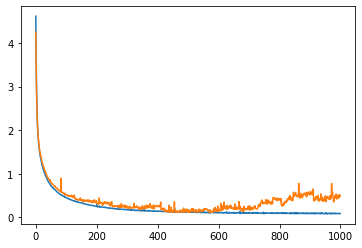

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>Classification Report</h3>

In [16]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.95      1.00      0.97        18
           2       1.00      0.91      0.95        23
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23
           5       1.00      0.65      0.79        20
           6       1.00      1.00      1.00        23
           7       0.96      1.00      0.98        25
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        13
          10       0.79      0.96      0.86        23
          11       1.00      0.94      0.97        17
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        31
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        25
          17       1.00    

<h1>Sigmoid-like Damage</h1>

In [24]:
df_sig = pd.read_csv('input/results_complete_sigmoid_like.csv')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['elem_damaged', 'damage'], axis=1), df_sig['elem_damaged'], test_size=0.10, random_state=41)

In [26]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

In [44]:
%%time
path = 'models/sig_class'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(126)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy']) #.0001
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 80)                10160     
                                                                 
 dense_29 (Dense)            (None, 80)                6480      
                                                                 
 dense_30 (Dense)            (None, 80)                6480      
                                                                 
 dense_31 (Dense)            (None, 129)               10449     
                                                                 
Total params: 33,569
Trainable params: 33,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 1s 1ms/step - loss: 4.8159 - accuracy: 0.0324 - val_loss: 4.6631 - val_accuracy: 0.0496
Epoch 2/1000
726/726 [================

INFO:tensorflow:Assets written to: models/sig_class/assets


INFO:tensorflow:Assets written to: models/sig_class/assets


CPU times: user 27min 50s, sys: 3min 43s, total: 31min 33s
Wall time: 15min 38s


In [45]:
pd.DataFrame(history.history).to_csv('output/history_mlp_class_sig.csv')

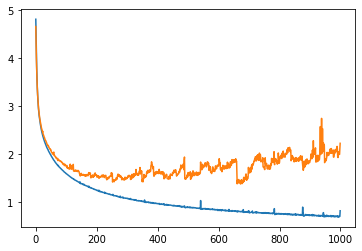

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [47]:
pred = model.predict(X_test)

<h3>Classification Report</h3>

In [48]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74        21
           1       1.00      0.78      0.88        18
           2       1.00      0.74      0.85        23
           3       0.95      0.90      0.92        20
           4       0.81      0.91      0.86        23
           5       1.00      0.20      0.33        20
           6       0.91      0.87      0.89        23
           7       0.91      0.84      0.87        25
           8       0.96      0.88      0.92        25
           9       1.00      0.77      0.87        13
          10       0.64      0.70      0.67        23
          11       1.00      0.76      0.87        17
          12       1.00      0.69      0.81        16
          13       0.89      0.81      0.85        31
          14       0.93      0.87      0.90        30
          15       1.00      0.95      0.97        19
          16       1.00      0.84      0.91        25
          17       0.92    